In [2]:
##импорт данных ##data import
import pandas as pd
import numpy as np
from pprint import pprint
import glob
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

1.1. Data parsing

In [3]:
read_files = glob.glob(r"C:\Users\Admin\Downloads\ДЭ\Вариант 2\data\*.geojson")
read_files

['C:\\Users\\Admin\\Downloads\\ДЭ\\Вариант 2\\data\\chukotskii-avtonomnyi-okrug.geojson',
 'C:\\Users\\Admin\\Downloads\\ДЭ\\Вариант 2\\data\\iamalo-nenetskii-avtonomnyi-okrug.geojson']

In [4]:
#чтение каждого файла #reading each file
read_files = glob.glob(r"C:\Users\Admin\Downloads\ДЭ\Вариант 2\data\*.geojson")
output_list = []

for f in read_files:
    with open(f, "rb") as infile:
        output_list.append(json.load(infile))

with open("merged_file.json", "w") as outfile:
    json.dump(output_list, outfile)

In [5]:
#Объединение файлов #Merging files
with codecs.open('merged_file.json', 'r', 'utf-8') as json_file:  
    data = json.load(json_file)
    
df = pd.json_normalize(data, errors='ignore')
df

,type,features
0,FeatureCollection,"[{'type': 'Feature', 'geometry': {'type': 'Poi..."
1,FeatureCollection,"[{'type': 'Feature', 'geometry': {'type': 'Poi..."


In [6]:
#Нормализация данных #Data normalization
df = pd.json_normalize(data, record_path=['features', 'properties', 'vehicles', 'participants'], meta = [
    ['features', 'properties','id'],
    ['features', 'properties', 'tags'],
    ['features', 'properties', 'light'],
    ['features', 'properties', 'point'], #2 cols
    ['features', 'properties', 'nearby'],
    ['features', 'properties', 'region'],
    ['features', 'properties', 'address'],
    ['features', 'properties', 'weather'],
    ['features', 'properties', 'category'],
    ['features', 'properties', 'datetime'],
    ['features', 'properties', 'severity'],
    ['features', 'properties', 'vehicles', 'year'],
    ['features', 'properties', 'vehicles', 'brand'],
    ['features', 'properties', 'vehicles', 'color'],
    ['features', 'properties', 'vehicles', 'model'],
    ['features', 'properties', 'vehicles', 'category'],
    ['features', 'properties','dead_count'],
    ['features', 'properties','participants'],
    ['features', 'properties','injured_count'],
    ['features', 'properties','parent_region'],
    ['features', 'properties','road_conditions'],
    ['features', 'properties','participants_count'],
    ['features', 'properties','participant_categories'],
], errors='ignore')

df = pd.concat([df.drop('features.properties.point', axis=1), pd.DataFrame(df['features.properties.point'].tolist())], axis=1)
df

,role,gender,violations,health_status,years_of_driving_experience,features.properties.id,features.properties.tags,features.properties.light,features.properties.nearby,features.properties.region,features.properties.address,features.properties.weather,features.properties.category,features.properties.datetime,features.properties.severity,features.properties.vehicles.year,features.properties.vehicles.brand,features.properties.vehicles.color,features.properties.vehicles.model,features.properties.vehicles.category,features.properties.dead_count,features.properties.participants,features.properties.injured_count,features.properties.parent_region,features.properties.road_conditions,features.properties.participants_count,features.properties.participant_categories,lat,long
0,Водитель,Мужской,"[Управление ТС лицом, не имеющим права на упра...",Скончался на месте ДТП до приезда скорой медиц...,NaN,2650799,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует",[],Чукотский район,None,[Метель],Съезд с дороги,2021-11-29 12:15:00,С погибшими,2017,Прочие марки ТС,Белый,Прочие марки и модели ТС,Снегоходы,1,[],0,Чукотский автономный округ,[Заснеженное],1,[Все участники],66.131631,-169.885712
1,Водитель,Мужской,"[Управление ТС лицом, не имеющим права на упра...","Раненый, находящийся (находившийся) на стацион...",NaN,2095547,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено",[Нерегулируемый перекрёсток неравнозначных ули...,Чукотский район,"с Лорино, ул Чукотская, 14",[Ясно],Наезд на препятствие,2017-10-06 18:00:00,Тяжёлый,2013,Прочие марки мотоциклов,Серый,Прочие марки мотоциклов,Мотоциклы,0,[],1,Чукотский автономный округ,[Сухое],1,"[Мотоциклисты, Все участники]",65.503657,171.702753
2,Водитель,Мужской,[Нарушение правил расположения ТС на проезжей ...,Скончался на месте ДТП до приезда скорой медиц...,25.0,2095656,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует",[],Чукотский район,None,[Ясно],Опрокидывание,2016-11-14 21:40:00,С погибшими,1995,TOYOTA,Красный,Hilux,"В-класс (малый) до 3,9 м",1,[],0,Чукотский автономный округ,[Сухое],1,[Все участники],65.970000,171.985300
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на стацион...",NaN,2095593,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует",[],Чукотский район,None,[Туман],Наезд на стоящее ТС,2016-01-06 06:00:00,Тяжёлый,None,Прочие марки ТС,Белый,Прочие марки и модели ТС,Снегоходы,0,[],2,Чукотский автономный округ,[Заснеженное],5,[Все участники],65.500000,171.716670
4,Пассажир,Женский,[],Не пострадал,NaN,2095593,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует",[],Чукотский район,None,[Туман],Наезд на стоящее ТС,2016-01-06 06:00:00,Тяжёлый,None,Прочие марки ТС,Белый,Прочие марки и модели ТС,Снегоходы,0,[],2,Чукотский автономный округ,[Заснеженное],5,[Все участники],65.500000,171.716670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,Пассажир,Мужской,[],Не пострадал,NaN,2020510,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","[Остановка общественного транспорта, Одиночный...",Лабытнанги,"г Лабытнанги, ул Гагарина, 35 б",[Снегопад],Наезд на пешехода,2019-12-11 18:59:00,С погибшими,1992,MITSUBISHI,Серый,Pajero,Минивэны и универсалы повышенной вместимости,1,"[{'role': 'Пешеход', 'gender': 'Мужской', 'vio...",0,Ямало-Ненецкий автономный округ,"[Недостатки зимнего содержания, Заснеженное]",3,"[Пешеходы, Все участники]",66.655248,66.377839
7785,Водитель,Мужской,[Несоответствие скорости конкретным условиям д...,"Раненый, находящийся (находившийся) на амбула...",2.0,2021481,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует",[],Лабытнанги,"г Лабытнанги, Автодорога Лабытнанги - Харп, 11 км",[Ясно],Опрокидывание,2018-11-11 19:30:00,Легкий,2008,ВАЗ,Серый,ВАЗ 2114 и модификации,"D-класс (средний) до 4,6 м",0,[],1,

In [7]:
df1 =  (df.set_index('features.properties.id')['features.properties.participants']
       .apply(pd.Series).stack()
         .apply(pd.Series).reset_index().drop('level_1',1))

df = df.merge(df1, how='left', on='features.properties.id')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\564082740.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1 =  (df.set_index('features.properties.id')['features.properties.participants']
C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\564082740.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 =  (df.set_index('features.properties.id')['features.properties.participants']


In [8]:
df=df.drop('features.properties.participants', axis=1)

In [9]:
df.isna().sum()

role_x                                           0
gender_x                                       150
violations_x                                     0
health_status_x                                 11
years_of_driving_experience                   3440
features.properties.id                           0
features.properties.tags                         0
features.properties.light                        0
features.properties.nearby                       0
features.properties.region                       0
features.properties.address                    954
features.properties.weather                      0
features.properties.category                     0
features.properties.datetime                     0
features.properties.severity                     0
features.properties.vehicles.year              175
features.properties.vehicles.brand             144
features.properties.vehicles.color              52
features.properties.vehicles.model             144
features.properties.vehicles.ca

1.2 Предобработка данных и выделение значимых атрибутов Data preprocessing and highlighting of significant attributes

Все данных выгруженные и json представленны. Рассмотрим некоторые статистику и размерность
All data is uploaded and json is presented. Consider some statistics and dimension

In [10]:
#Заполнение недостаюших данных #Filling in missing data
df=df.fillna(0)

In [11]:
df.shape

(8163, 32)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8163 entries, 0 to 8162
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   role_x                                      8163 non-null   object 
 1   gender_x                                    8163 non-null   object 
 2   violations_x                                8163 non-null   object 
 3   health_status_x                             8163 non-null   object 
 4   years_of_driving_experience                 8163 non-null   float64
 5   features.properties.id                      8163 non-null   int64  
 6   features.properties.tags                    8163 non-null   object 
 7   features.properties.light                   8163 non-null   object 
 8   features.properties.nearby                  8163 non-null   object 
 9   features.properties.region                  8163 non-null   object 
 10  features.pro

Рассмотрим количество пустых значений после предобработки
Consider the number of empty values after preprocessing

In [13]:
df.isna().sum()

role_x                                        0
gender_x                                      0
violations_x                                  0
health_status_x                               0
years_of_driving_experience                   0
features.properties.id                        0
features.properties.tags                      0
features.properties.light                     0
features.properties.nearby                    0
features.properties.region                    0
features.properties.address                   0
features.properties.weather                   0
features.properties.category                  0
features.properties.datetime                  0
features.properties.severity                  0
features.properties.vehicles.year             0
features.properties.vehicles.brand            0
features.properties.vehicles.color            0
features.properties.vehicles.model            0
features.properties.vehicles.category         0
features.properties.dead_count          

Предобработка перечеслений в наборе данных
Preprocessing enumerations in a dataset

In [14]:
#Функция explode разворачивает списки в строки #The explode function expands lists into strings
df = df.explode('violations_x')
df = df.explode('features.properties.tags')
df = df.explode('features.properties.nearby')
df = df.explode('features.properties.weather')
df = df.explode('features.properties.road_conditions')
df = df.explode('features.properties.participant_categories')

In [15]:
df

,role_x,gender_x,violations_x,health_status_x,years_of_driving_experience,features.properties.id,features.properties.tags,features.properties.light,features.properties.nearby,features.properties.region,features.properties.address,features.properties.weather,features.properties.category,features.properties.datetime,features.properties.severity,features.properties.vehicles.year,features.properties.vehicles.brand,features.properties.vehicles.color,features.properties.vehicles.model,features.properties.vehicles.category,features.properties.dead_count,features.properties.injured_count,features.properties.parent_region,features.properties.road_conditions,features.properties.participants_count,features.properties.participant_categories,lat,long,role_y,gender_y,violations_y,health_status_y
0,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...",Скончался на месте ДТП до приезда скорой медиц...,0.0,2650799,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,Чукотский район,0,Метель,Съезд с дороги,2021-11-29 12:15:00,С погибшими,2017,Прочие марки ТС,Белый,Прочие марки и модели ТС,Снегоходы,1,0,Чукотский автономный округ,Заснеженное,1,Все участники,66.131631,-169.885712,0,0,0,0
0,Водитель,Мужской,Нарушение правил применения мотошлема,Скончался на месте ДТП до приезда скорой медиц...,0.0,2650799,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",NaN,Чукотский район,0,Метель,Съезд с дороги,2021-11-29 12:15:00,С погибшими,2017,Прочие марки ТС,Белый,Прочие марки и модели ТС,Снегоходы,1,0,Чукотский автономный округ,Заснеженное,1,Все участники,66.131631,-169.885712,0,0,0,0
1,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...","Раненый, находящийся (находившийся) на стацион...",0.0,2095547,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Нерегулируемый перекрёсток неравнозначных улиц...,Чукотский район,"с Лорино, ул Чукотская, 14",Ясно,Наезд на препятствие,2017-10-06 18:00:00,Тяжёлый,2013,Прочие марки мотоциклов,Серый,Прочие марки мотоциклов,Мотоциклы,0,1,Чукотский автономный округ,Сухое,1,Мотоциклисты,65.503657,171.702753,0,0,0,0
1,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...","Раненый, находящийся (находившийся) на стацион...",0.0,2095547,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Нерегулируемый перекрёсток неравнозначных улиц...,Чукотский район,"с Лорино, ул Чукотская, 14",Ясно,Наезд на препятствие,2017-10-06 18:00:00,Тяжёлый,2013,Прочие марки мотоциклов,Серый,Прочие марки мотоциклов,Мотоциклы,0,1,Чукотский автономный округ,Сухое,1,Все участники,65.503657,171.702753,0,0,0,0
1,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...","Раненый, находящийся (находившийся) на стацион...",0.0,2095547,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Медицинские (лечебные) организации,Чукотский район,"с Лорино, ул Чукотская, 14",Ясно,Наезд на препятствие,2017-10-06 18:00:00,Тяжёлый,2013,Прочие марки мотоциклов,Серый,Прочие марки мотоциклов,Мотоциклы,0,1,Чукотский автономный округ,Сухое,1,Мотоциклисты,65.503657,171.702753,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8160,Водитель,Мужской,Другие нарушения ПДД водителем,Не пострадал,24.0,2021439,Дорожно-транспортные происшествия,Светлое время суток,"Одиночный торговый объект, являющийся местом п...",Лабытнанги,"г Лабытнанги, ул Первомайская, 24",Пасмурно,Иной вид ДТП,2018-10-07 18:00:00,Легкий,2014,FORD,Белый,Transit,Прочие одноярусные,0,1,Ямало-Ненецкий автономный округ,Неудовлетворительное состояние обочин,2,Все участники,66.657344,66.394887,0,0,0,0
8161,Пассажир,0,Нарушение правил применения ремней безопасност...,"Раненый, находящийся (находившийся) на амбула...",0.0,2021439,Дорожно-транспортные происшествия,Светлое время суток,"Одиночный торговый объект, являющийся местом п...",Лабытнанги,"г

In [16]:
#Удаление дубликатов #Removing duplicates
df=df.drop_duplicates(subset=['features.properties.id'])
df=df.fillna(0)

In [17]:
df=df[df['features.properties.address']!=0]
df.reset_index(drop=True, inplace=True)

In [18]:
#Вычисление частоты и количества ДТП #Calculation of the frequency and number of accidents
result = pd.merge(df, df.groupby(['features.properties.address']).size().sort_values(ascending=False).to_frame(), on="features.properties.address")
result.rename(columns={0: 'count'},inplace=True)
#result.groupby(['properties.address']).size().sort_values(ascending=False).to_frame()
df = result

Определение наиболее важных атрибутов Determining the most important attributes

Чтобы найти наиболее значимые атрибуты, построим корреляцию Пирсона на тепловой карте
To find the most significant attributes, let's build the Pearson correlation on the heat map

Text(0.5, 1.0, 'Correlation Heatmap')

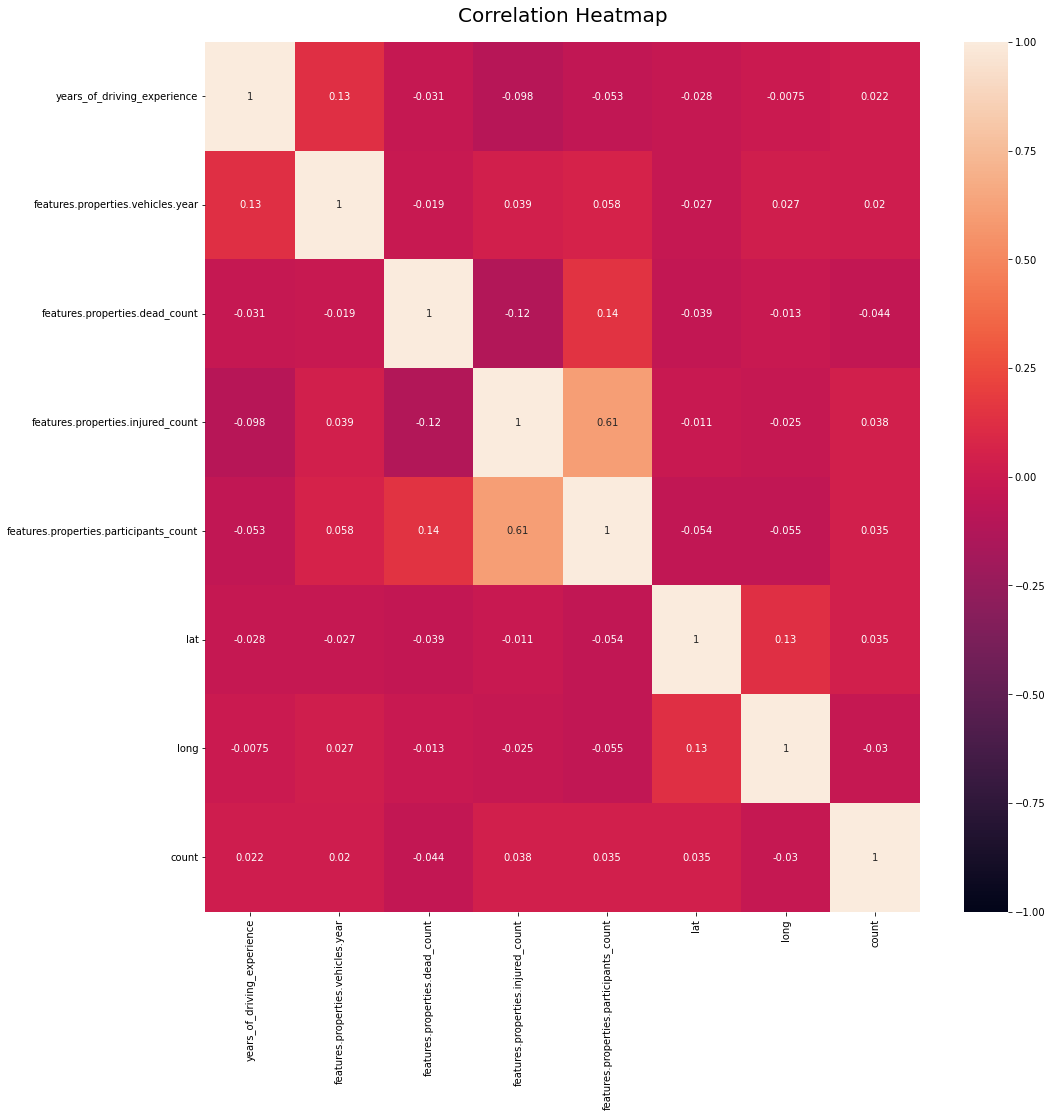

In [19]:
# Фомирование корреляции Пирсона # Pearson correlation formation
corr=df.drop(['features.properties.id'], axis=1).corr()
plt.figure(figsize=(16, 16))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

Как видим выше наиболее значимыми атрибутами являются: features.properties.dead_count, features.properties.injured_count, features.properties.participants_count

1.3 Описание структуры набора данных Description of the data set structure
"id": 384094, # идентификатор

"tags": ["Дорожно-транспортные происшествия"], # показатели с официального сайта ГИБДД

"light": "Светлое время суток", # время суток

"point": {"lat": 50.6039, "long": 36.5578}, # координаты

"nearby": [ "Нерегулируемый перекрёсток неравнозначных улиц (дорог)", "Жилые дома индивидуальной застройки"], # координаты

"region": "Белгород", # город/район

"address": "г Белгород, ул Сумская, 30", # адрес

"weather": ["Ясно"], # погода

"category": "Столкновение", # тип ДТП

"datetime": "2017-08-05 13:06:00", # дата и время

"severity": "Легкий", # тяжесть ДТП/вред здоровью

"vehicles": [ # участники – транспортные средства

"year": 2010, # год производства транспортного средства

"brand": "ВАЗ", # марка транспортного средства

"color": "Иные цвета", # цвет транспортного средства

"model": "Priora", # модель транспортного средства

"category": "С-класс (малый средний, компактный) до 4,3 м", # категория транспортного средства

"participants": [ # участники внутри транспортных средств

"role": "Водитель", # роль участника

"gender": "Женский", # пол участника

"violations": [], # нарушения правил участником

"health_status": "Раненый, находящийся...", # состояние здоровья участника

"years_of_driving_experience": 11 # стаж вождения участника (только у водителей)

"dead_count": 0, # кол-во погибших в ДТП

"participants": [], # участники без транспортных средств (описание, как у участников внутри транспортных средств)

"injured_count": 2, # кол-во раненых в ДТП

"parent_region": "Белгородская область", # регион

"road_conditions": ["Сухое"], # состояние дорожного покрытия

"participants_count": 3, # кол-во участников ДТП

"participant_categories": ["Все участники", "Дети"] # категории участников

In [20]:
df.isna().sum()

role_x                                        0
gender_x                                      0
violations_x                                  0
health_status_x                               0
years_of_driving_experience                   0
features.properties.id                        0
features.properties.tags                      0
features.properties.light                     0
features.properties.nearby                    0
features.properties.region                    0
features.properties.address                   0
features.properties.weather                   0
features.properties.category                  0
features.properties.datetime                  0
features.properties.severity                  0
features.properties.vehicles.year             0
features.properties.vehicles.brand            0
features.properties.vehicles.color            0
features.properties.vehicles.model            0
features.properties.vehicles.category         0
features.properties.dead_count          

1.4 Формирование дополнительных атрибутов Formation of additional attributes
Формиование индекса будет производиться на основе количества ДТП, частоты и тяжести. The index will be formed based on the number of accidents, frequency and severity.

In [21]:
#Формирование первичных полей #Formation of primary fields
df['Hazard_level'] = None
count_places_max = df['count'].max()
injured_max = df['features.properties.injured_count'].max()
dead_max = df['features.properties.dead_count'].max()

In [22]:
#Вычисление индекса #Index calculation
for i in range(len(df)):
    if df['features.properties.dead_count'][i] > 0:
        df['Hazard_level'][i] = (df['features.properties.injured_count'][i]+df['count'][i])/((injured_max+count_places_max)/2)/4
    else:
        df['Hazard_level'][i] = (df['features.properties.dead_count'][i]*100/dead_max)/100/2+0.5

C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\2344188355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hazard_level'][i] = (df['features.properties.dead_count'][i]*100/dead_max)/100/2+0.5
C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\2344188355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hazard_level'][i] = (df['features.properties.injured_count'][i]+df['count'][i])/((injured_max+count_places_max)/2)/4


In [23]:
df.head()

,role_x,gender_x,violations_x,health_status_x,years_of_driving_experience,features.properties.id,features.properties.tags,features.properties.light,features.properties.nearby,features.properties.region,features.properties.address,features.properties.weather,features.properties.category,features.properties.datetime,features.properties.severity,features.properties.vehicles.year,features.properties.vehicles.brand,features.properties.vehicles.color,features.properties.vehicles.model,features.properties.vehicles.category,features.properties.dead_count,features.properties.injured_count,features.properties.parent_region,features.properties.road_conditions,features.properties.participants_count,features.properties.participant_categories,lat,long,role_y,gender_y,violations_y,health_status_y,count,Hazard_level
0,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...","Раненый, находящийся (находившийся) на стацион...",0.0,2095547,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Нерегулируемый перекрёсток неравнозначных улиц...,Чукотский район,"с Лорино, ул Чукотская, 14",Ясно,Наезд на препятствие,2017-10-06 18:00:00,Тяжёлый,2013,Прочие марки мотоциклов,Серый,Прочие марки мотоциклов,Мотоциклы,0,1,Чукотский автономный округ,Сухое,1,Мотоциклисты,65.503657,171.702753,0,0,0,0,1,0.5
1,Пассажир,Женский,0,"Раненый, находящийся (находившийся) на стацион...",0.0,2095651,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Многоквартирные жилые дома,Чукотский район,"с Лаврентия, ул Дежнева, 44",Ясно,Съезд с дороги,2017-01-21 21:30:00,С погибшими,2009,Прочие марки ТС,Зеленый,Прочие марки и модели ТС,Снегоходы,1,1,Чукотский автономный округ,Недостатки зимнего содержания,2,Все участники,65.951700,171.001400,0,0,0,0,1,0.035714
2,Водитель,Мужской,"Управление ТС лицом, не имеющим права на управ...",Не пострадал,0.0,2095634,Дорожно-транспортные происшествия,Светлое время суток,0,Чукотский район,"с Лорино, ул Енок, 18 А",Ясно,Наезд на пешехода,2017-09-06 16:00:00,С погибшими,2001,УРАЛ,Иные цвета,5557,Самосвалы,1,0,Чукотский автономный округ,Сухое,2,Пешеходы,65.504226,171.708932,"Пешеход, перед ДТП находившийся в (на) ТС в ка...",Женский,[],Скончался на месте ДТП до приезда скорой медиц...,1,0.017857
3,Водитель,Мужской,"Несоблюдение условий, разрешающих движение тра...",Не пострадал,0.0,2095647,Дорожно-транспортные происшествия,Светлое время суток,Производственное предприятие,Чукотский район,"с Нешкан, ул Набережная, 19",Пасмурно,"Наезд на лицо, не являющееся участником дорожн...",2019-05-02 12:00:00,С погибшими,2000,ГАЗ,Зеленый,Прочие модели ГАЗ,Прочие самоходные машины и механизмы,1,0,Чукотский автономный округ,Заснеженное,2,Все участники,67.037575,-172.956036,0,0,0,0,1,0.017857
4,Водитель,Мужской,Несоответствие скорости конкретным условиям дв...,"Раненый, находящийся (находившийся) на стацион...",2.0,2095567,Дорожно-транспортные происшествия,"В темное время суток, освещение включено",Многоквартирные жилые дома,Чукотский район,"с Инчоун, ул Тынетегина, 11",Дождь,Опрокидывание,2016-10-08 19:00:00,Тяжёлый,2016,Прочие марки ТС,Черный,Прочие марки и модели ТС,Квадрициклы,0,1,Чукотский автономный округ,Мокрое,1,Все участники,66.298131,170.280378,0,0,0,0,1,0.5


In [24]:
df.to_csv('result_data.csv', encoding='utf-8-sig', index=False)